Look: If you do not have this notebook filled then dont worry.

Remember, you want the knowledge more into your head and less in your computer


Dont rely on this notebook, its a trap.

### whatever will go on just go on & it wont stop until its done

Types of learning algorithms
1. supervised learning
2. unsupervised learning
3. reinforcement learning

### Supervised learning

1. k Nearest Neighbors
2. linear regression
3. logistic regression
4. support vector machines
5. decision trees
6. neural networks

### Unsupervised learning

1. k means clustering
2. dbscan
3. hierarchical clustering

In [1]:
import numpy as np

In [2]:
import sklearn

I aim to complete 4 chapters today

These are 4 chapters: ML landscape, end to end ML project, Classification, Training Models

In [3]:
from sklearn.datasets import fetch_openml

# Create an end to end pipeline in ml

# First manually and then using sklearn.pipeline.Pipeline

## Import dataset

In [4]:
import os
import tarfile
from six.moves import urllib

In [5]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [6]:
fetch_housing_data()

In [7]:
import pandas as pd

In [8]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [9]:
df = load_housing_data()

In [10]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f988b5e8150>,
      dtype=object)

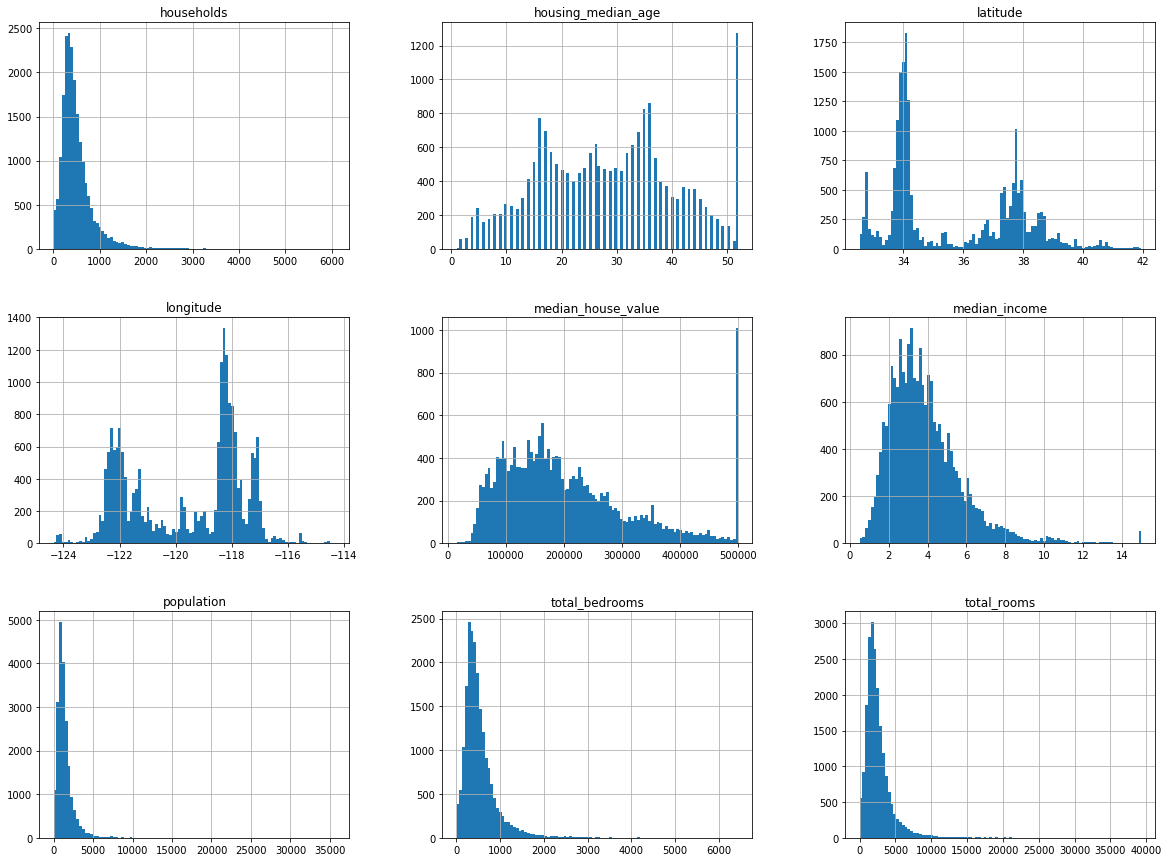

In [13]:
df.hist(bins=100,figsize=(20,15))

In [14]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Splitting train-test sets

In [15]:
# manual function

In [16]:
def train_test_split(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_count = int(len(data)*test_ratio)
    test_set = data.iloc[shuffled_indices[:test_count]]
    train_set = data.iloc[shuffled_indices[test_count:]]
    return train_set, test_set

In [17]:
# sklearn utility

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
sklearn.model_selection.GridSearchCV?

# Chapter 3 classification

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Good old friend "MNIST" - <i><u>Hello world </u></i>of machine learning

<b>70000 28*28 small images

load Dataset

In [22]:
from sklearn.datasets import fetch_openml

In [25]:
mnist = fetch_openml('mnist_784', version=1)

In [26]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [27]:
mnist.data.shape

(70000, 784)

In [28]:
mnist.target.shape

(70000,)

In [29]:
set(mnist.target)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

### split into X, y

In [30]:
X = mnist.data
y = mnist.target

In [31]:
# y is array of strings, convert them into integers
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [32]:
# split train and test
# already shuffled, no need to shuffle

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

### This is a multiclass classification problem with 10 classes

In [36]:
from sklearn.linear_model import SGDClassifier

In [37]:
clf = SGDClassifier(alpha=0.001,n_jobs=-1,max_iter=10000,verbose=1)

In [38]:
clf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1

Norm: 706.57, NNZs: 622, Bias: -28.839797, T: 56000, Avg. loss: 5882.716680
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 503.45, NNZs: 568, Bias: -0.287011, T: 56000, Avg. loss: 3761.696015
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 719.38, NNZs: 600, Bias: -48.406023, T: 56000, Avg. loss: 14479.271904
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 729.51, NNZs: 636, Bias: -29.414747, T: 56000, Avg. loss: 11963.694035
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 445.72, NNZs: 628, Bias: -30.287616, T: 112000, Avg. loss: 522.204201
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 313.21, NNZs: 593, Bias: -0.568504, T: 112000, Avg. loss: 299.483226
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 424.33, NNZs: 614, Bias: -51.159270, T: 112000, Avg. loss: 1516.841344
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 426.57, NNZs: 640, Bias: -30.617067, T: 112000, Avg. loss: 1157.012272
Total training time: 0.2

Norm: 74.49, NNZs: 635, Bias: -1.266848, T: 1064000, Avg. loss: 19.634514
Total training time: 2.32 seconds.
-- Epoch 20
Norm: 81.90, NNZs: 675, Bias: -34.582205, T: 1064000, Avg. loss: 89.087522
Total training time: 2.36 seconds.
-- Epoch 20
Norm: 94.77, NNZs: 647, Bias: -33.764007, T: 1120000, Avg. loss: 34.819468
Total training time: 2.39 seconds.
-- Epoch 21
Norm: 78.97, NNZs: 640, Bias: -59.704762, T: 1064000, Avg. loss: 113.595489
Total training time: 2.39 seconds.
-- Epoch 20
Norm: 71.93, NNZs: 638, Bias: -1.283128, T: 1120000, Avg. loss: 19.618898
Total training time: 2.43 seconds.
-- Epoch 21
Norm: 78.20, NNZs: 675, Bias: -34.678434, T: 1120000, Avg. loss: 82.943830
Total training time: 2.48 seconds.
-- Epoch 21
Norm: 91.92, NNZs: 647, Bias: -33.819845, T: 1176000, Avg. loss: 30.817690
Total training time: 2.51 seconds.
-- Epoch 22
Norm: 76.61, NNZs: 640, Bias: -59.900092, T: 1120000, Avg. loss: 110.412728
Total training time: 2.51 seconds.
-- Epoch 21
Norm: 69.77, NNZs: 638, 

Norm: 47.78, NNZs: 639, Bias: -1.422248, T: 2128000, Avg. loss: 9.709209
Total training time: 4.61 seconds.
-- Epoch 39
Norm: 48.27, NNZs: 645, Bias: -62.149464, T: 2072000, Avg. loss: 58.327642
Total training time: 4.65 seconds.
-- Epoch 38
Norm: 58.92, NNZs: 649, Bias: -34.614656, T: 2184000, Avg. loss: 17.107976
Total training time: 4.66 seconds.
-- Epoch 40
Norm: 48.38, NNZs: 676, Bias: -35.742064, T: 2128000, Avg. loss: 42.967272
Total training time: 4.68 seconds.
-- Epoch 39
Norm: 46.93, NNZs: 639, Bias: -1.429179, T: 2184000, Avg. loss: 9.812103
Total training time: 4.73 seconds.
-- Epoch 40
Norm: 47.14, NNZs: 646, Bias: -62.246613, T: 2128000, Avg. loss: 56.062348
Total training time: 4.78 seconds.
-- Epoch 39
Norm: 57.83, NNZs: 649, Bias: -34.642631, T: 2240000, Avg. loss: 16.592768
Total training time: 4.78 seconds.
-- Epoch 41
Norm: 47.23, NNZs: 676, Bias: -35.780094, T: 2184000, Avg. loss: 42.373206
Total training time: 4.81 seconds.
-- Epoch 40
Norm: 46.01, NNZs: 639, Bias

Norm: 35.62, NNZs: 677, Bias: -36.393000, T: 3136000, Avg. loss: 29.331103
Total training time: 6.89 seconds.
-- Epoch 57
Norm: 36.06, NNZs: 648, Bias: -63.530345, T: 3080000, Avg. loss: 38.804732
Total training time: 6.91 seconds.
-- Epoch 56
Norm: 36.51, NNZs: 639, Bias: -1.505415, T: 3192000, Avg. loss: 6.068158
Total training time: 6.92 seconds.
-- Epoch 58
Norm: 43.96, NNZs: 650, Bias: -35.098748, T: 3248000, Avg. loss: 11.596387
Total training time: 6.93 seconds.
-- Epoch 59
Norm: 34.84, NNZs: 677, Bias: -36.421753, T: 3192000, Avg. loss: 28.887298
Total training time: 7.01 seconds.
-- Epoch 58
Norm: 35.57, NNZs: 648, Bias: -63.597950, T: 3136000, Avg. loss: 38.069275
Total training time: 7.03 seconds.
-- Epoch 57
Norm: 43.43, NNZs: 650, Bias: -35.120108, T: 3304000, Avg. loss: 11.204905
Total training time: 7.05 seconds.
-- Epoch 60
Norm: 35.98, NNZs: 640, Bias: -1.509462, T: 3248000, Avg. loss: 6.131941
Total training time: 7.06 seconds.
-- Epoch 59
Norm: 34.62, NNZs: 679, Bias

Norm: 36.23, NNZs: 650, Bias: -35.422295, T: 4256000, Avg. loss: 8.786852
Total training time: 9.08 seconds.
-- Epoch 77
Norm: 28.95, NNZs: 681, Bias: -36.842142, T: 4144000, Avg. loss: 21.967376
Total training time: 9.09 seconds.
-- Epoch 75
Norm: 30.66, NNZs: 640, Bias: -1.554602, T: 4200000, Avg. loss: 4.791539
Total training time: 9.13 seconds.
-- Epoch 76
Norm: 29.20, NNZs: 649, Bias: -64.518570, T: 4088000, Avg. loss: 28.753792
Total training time: 9.14 seconds.
-- Epoch 74
Norm: 35.86, NNZs: 650, Bias: -35.439324, T: 4312000, Avg. loss: 8.343600
Total training time: 9.20 seconds.
-- Epoch 78
Norm: 28.54, NNZs: 681, Bias: -36.862532, T: 4200000, Avg. loss: 21.913183
Total training time: 9.22 seconds.
-- Epoch 76
Norm: 30.43, NNZs: 640, Bias: -1.558384, T: 4256000, Avg. loss: 4.577668
Total training time: 9.25 seconds.
-- Epoch 77
Norm: 28.94, NNZs: 649, Bias: -64.564476, T: 4144000, Avg. loss: 28.692872
Total training time: 9.26 seconds.
-- Epoch 75
Norm: 35.47, NNZs: 650, Bias: 

Norm: 27.03, NNZs: 643, Bias: -1.597597, T: 5152000, Avg. loss: 3.823250
Total training time: 11.19 seconds.
-- Epoch 93
Norm: 24.85, NNZs: 683, Bias: -37.181342, T: 5096000, Avg. loss: 18.094949
Total training time: 11.21 seconds.
-- Epoch 92
Norm: 30.87, NNZs: 650, Bias: -35.669883, T: 5264000, Avg. loss: 6.974217
Total training time: 11.24 seconds.
-- Epoch 95
Norm: 24.90, NNZs: 649, Bias: -65.236467, T: 5040000, Avg. loss: 23.556274
Total training time: 11.25 seconds.
-- Epoch 91
Norm: 26.87, NNZs: 643, Bias: -1.600886, T: 5208000, Avg. loss: 3.755606
Total training time: 11.30 seconds.
-- Epoch 94
Norm: 24.69, NNZs: 683, Bias: -37.200087, T: 5152000, Avg. loss: 17.834499
Total training time: 11.33 seconds.
-- Epoch 93
Norm: 30.70, NNZs: 650, Bias: -35.682726, T: 5320000, Avg. loss: 6.886455
Total training time: 11.36 seconds.
-- Epoch 96
Norm: 24.73, NNZs: 649, Bias: -65.273360, T: 5096000, Avg. loss: 23.514384
Total training time: 11.38 seconds.
-- Epoch 92
Norm: 26.64, NNZs: 643

Norm: 22.34, NNZs: 649, Bias: -65.787425, T: 5936000, Avg. loss: 20.083452
Total training time: 13.24 seconds.
-- Epoch 107
Norm: 24.20, NNZs: 646, Bias: -1.629240, T: 6104000, Avg. loss: 3.196308
Total training time: 13.24 seconds.
-- Epoch 110
Norm: 27.14, NNZs: 652, Bias: -35.863620, T: 6216000, Avg. loss: 5.797468
Total training time: 13.27 seconds.
-- Epoch 112
Norm: 21.91, NNZs: 687, Bias: -37.458332, T: 6048000, Avg. loss: 15.081500
Total training time: 13.32 seconds.
-- Epoch 109
Norm: 24.06, NNZs: 646, Bias: -1.631684, T: 6160000, Avg. loss: 3.455494Norm: 22.17, NNZs: 649, Bias: -65.815926, T: 5992000, Avg. loss: 19.877789
Total training time: 13.36 seconds.

Total training time: 13.36 seconds.
-- Epoch 111
-- Epoch 108
Norm: 27.00, NNZs: 652, Bias: -35.874836, T: 6272000, Avg. loss: 5.891583
Total training time: 13.39 seconds.
-- Epoch 113
Norm: 21.61, NNZs: 687, Bias: -37.471013, T: 6104000, Avg. loss: 14.790627
Total training time: 13.44 seconds.
-- Epoch 110
Norm: 23.95, N

Norm: 20.05, NNZs: 649, Bias: -66.275595, T: 6888000, Avg. loss: 16.973889
Total training time: 15.37 seconds.
-- Epoch 124
Norm: 19.62, NNZs: 687, Bias: -37.684875, T: 7000000, Avg. loss: 12.997489
Total training time: 15.40 seconds.
-- Epoch 126
Norm: 22.00, NNZs: 647, Bias: -1.661816, T: 7112000, Avg. loss: 2.666372
Total training time: 15.40 seconds.
-- Epoch 128
Norm: 24.23, NNZs: 654, Bias: -36.039870, T: 7224000, Avg. loss: 4.988949
Total training time: 15.42 seconds.
-- Epoch 130
Norm: 19.92, NNZs: 649, Bias: -66.301328, T: 6944000, Avg. loss: 17.482886
Total training time: 15.49 seconds.
-- Epoch 125
Norm: 21.90, NNZs: 647, Bias: -1.663772, T: 7168000, Avg. loss: 2.761948
Total training time: 15.52 seconds.
-- Epoch 129
Norm: 19.55, NNZs: 687, Bias: -37.696971, T: 7056000, Avg. loss: 12.996096
Total training time: 15.53 seconds.
-- Epoch 127
Norm: 24.04, NNZs: 654, Bias: -36.049663, T: 7280000, Avg. loss: 5.136840
Total training time: 15.54 seconds.
-- Epoch 131
Norm: 19.85, N

Norm: 20.22, NNZs: 648, Bias: -1.684602, T: 8120000, Avg. loss: 2.404714
Total training time: 17.56 seconds.
-- Epoch 146
Norm: 22.07, NNZs: 654, Bias: -36.188143, T: 8232000, Avg. loss: 4.266902
Total training time: 17.58 seconds.
-- Epoch 148
Norm: 17.79, NNZs: 687, Bias: -37.899689, T: 8008000, Avg. loss: 11.514464
Total training time: 17.61 seconds.
-- Epoch 144
Norm: 18.28, NNZs: 651, Bias: -66.728806, T: 7896000, Avg. loss: 14.878642
Total training time: 17.61 seconds.
-- Epoch 142
Norm: 20.11, NNZs: 648, Bias: -1.685583, T: 8176000, Avg. loss: 2.384825
Total training time: 17.68 seconds.
-- Epoch 147
Norm: 21.97, NNZs: 654, Bias: -36.195775, T: 8288000, Avg. loss: 4.390528
Total training time: 17.70 seconds.
-- Epoch 149
Norm: 17.77, NNZs: 687, Bias: -37.909890, T: 8064000, Avg. loss: 11.016627
Total training time: 17.74 seconds.
-- Epoch 145
Norm: 18.21, NNZs: 651, Bias: -66.750883, T: 7952000, Avg. loss: 14.582719
Total training time: 17.74 seconds.
-- Epoch 143
Norm: 20.03, N

Norm: 149.47, NNZs: 662, Bias: -14.852900, T: 616000, Avg. loss: 187.790007
Total training time: 1.36 seconds.
-- Epoch 12
Norm: 16.76, NNZs: 653, Bias: -67.088847, T: 8848000, Avg. loss: 13.444526
Total training time: 19.72 seconds.
Convergence after 158 epochs took 19.72 seconds
-- Epoch 1
Norm: 127.54, NNZs: 669, Bias: -22.400582, T: 728000, Avg. loss: 89.661741
Total training time: 1.58 seconds.
-- Epoch 14
Norm: 297.40, NNZs: 618, Bias: -39.547450, T: 168000, Avg. loss: 420.716630
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 140.76, NNZs: 663, Bias: -14.768490, T: 672000, Avg. loss: 176.114515
Total training time: 1.48 seconds.
-- Epoch 13
Norm: 614.79, NNZs: 613, Bias: -15.086191, T: 56000, Avg. loss: 6337.498113
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 119.77, NNZs: 669, Bias: -22.465357, T: 784000, Avg. loss: 80.622442
Total training time: 1.70 seconds.
-- Epoch 15
Norm: 242.28, NNZs: 621, Bias: -40.187919, T: 224000, Avg. loss: 308.628366
Total training time:

Norm: 76.96, NNZs: 667, Bias: -13.887036, T: 1568000, Avg. loss: 73.156629
Total training time: 3.52 seconds.
-- Epoch 29
Norm: 80.92, NNZs: 635, Bias: -43.189734, T: 1064000, Avg. loss: 54.756451
Total training time: 2.49 seconds.
-- Epoch 20
Norm: 68.77, NNZs: 673, Bias: -23.190195, T: 1680000, Avg. loss: 35.522899
Total training time: 3.73 seconds.
-- Epoch 31
Norm: 79.12, NNZs: 652, Bias: -15.671388, T: 952000, Avg. loss: 61.306471
Total training time: 2.21 seconds.
-- Epoch 18
Norm: 74.82, NNZs: 667, Bias: -13.853930, T: 1624000, Avg. loss: 70.803007
Total training time: 3.65 seconds.
-- Epoch 30
Norm: 77.11, NNZs: 635, Bias: -43.281369, T: 1120000, Avg. loss: 50.607943
Total training time: 2.61 seconds.
-- Epoch 21
Norm: 66.73, NNZs: 673, Bias: -23.222918, T: 1736000, Avg. loss: 35.972129
Total training time: 3.85 seconds.
-- Epoch 32
Norm: 75.45, NNZs: 655, Bias: -15.673290, T: 1008000, Avg. loss: 58.382561
Total training time: 2.33 seconds.
-- Epoch 19
Norm: 73.19, NNZs: 668, B

Norm: 48.74, NNZs: 675, Bias: -23.637735, T: 2688000, Avg. loss: 22.391987
Total training time: 5.91 seconds.
-- Epoch 49
Norm: 49.66, NNZs: 639, Bias: -44.404914, T: 2072000, Avg. loss: 26.941377
Total training time: 4.70 seconds.
-- Epoch 38
Norm: 48.08, NNZs: 663, Bias: -15.794157, T: 1960000, Avg. loss: 29.811033
Total training time: 4.41 seconds.
-- Epoch 36
Norm: 53.27, NNZs: 670, Bias: -13.344194, T: 2576000, Avg. loss: 44.114834
Total training time: 5.80 seconds.
-- Epoch 47
Norm: 47.89, NNZs: 675, Bias: -23.654304, T: 2744000, Avg. loss: 22.329800
Total training time: 6.03 seconds.
-- Epoch 50
Norm: 48.78, NNZs: 639, Bias: -44.458670, T: 2128000, Avg. loss: 26.176330
Total training time: 4.82 seconds.
-- Epoch 39
Norm: 46.88, NNZs: 663, Bias: -15.807278, T: 2016000, Avg. loss: 28.074058
Total training time: 4.53 seconds.
-- Epoch 37
Norm: 52.38, NNZs: 670, Bias: -13.322293, T: 2632000, Avg. loss: 43.099438
Total training time: 5.92 seconds.
-- Epoch 48
Norm: 47.01, NNZs: 675, 

Norm: 42.00, NNZs: 671, Bias: -12.982978, T: 3584000, Avg. loss: 32.110107
Total training time: 8.03 seconds.
-- Epoch 65
Norm: 36.94, NNZs: 640, Bias: -45.129953, T: 3136000, Avg. loss: 17.660791
Total training time: 7.02 seconds.
-- Epoch 57
Norm: 37.59, NNZs: 676, Bias: -23.928239, T: 3752000, Avg. loss: 16.163794
Total training time: 8.24 seconds.
-- Epoch 68
Norm: 35.65, NNZs: 666, Bias: -15.876301, T: 3024000, Avg. loss: 18.309036
Total training time: 6.71 seconds.
-- Epoch 55
Norm: 41.53, NNZs: 671, Bias: -12.961679, T: 3640000, Avg. loss: 31.079091
Total training time: 8.15 seconds.
-- Epoch 66
Norm: 36.54, NNZs: 640, Bias: -45.160294, T: 3192000, Avg. loss: 17.456941
Total training time: 7.14 seconds.
-- Epoch 58
Norm: 37.29, NNZs: 676, Bias: -23.940935, T: 3808000, Avg. loss: 15.931822
Total training time: 8.36 seconds.
-- Epoch 69
Norm: 35.26, NNZs: 666, Bias: -15.879873, T: 3080000, Avg. loss: 18.798218
Total training time: 6.84 seconds.
-- Epoch 56
Norm: 41.09, NNZs: 673, 

Norm: 30.06, NNZs: 641, Bias: -45.612565, T: 4144000, Avg. loss: 13.421163
Total training time: 9.20 seconds.
-- Epoch 75
Norm: 31.74, NNZs: 677, Bias: -24.133190, T: 4760000, Avg. loss: 12.808550
Total training time: 10.43 seconds.
-- Epoch 86
Norm: 34.89, NNZs: 673, Bias: -12.723974, T: 4592000, Avg. loss: 24.224301
Total training time: 10.26 seconds.
-- Epoch 83
Norm: 29.27, NNZs: 669, Bias: -15.921638, T: 4032000, Avg. loss: 14.003447
Total training time: 8.89 seconds.
-- Epoch 73
Norm: 29.80, NNZs: 641, Bias: -45.637248, T: 4200000, Avg. loss: 13.272984
Total training time: 9.32 seconds.
-- Epoch 76
Norm: 31.53, NNZs: 677, Bias: -24.143619, T: 4816000, Avg. loss: 12.360340
Total training time: 10.55 seconds.
-- Epoch 87
Norm: 34.54, NNZs: 673, Bias: -12.712069, T: 4648000, Avg. loss: 23.852088
Total training time: 10.38 seconds.
-- Epoch 84
Norm: 28.97, NNZs: 669, Bias: -15.923614, T: 4088000, Avg. loss: 13.695247
Total training time: 9.01 seconds.
-- Epoch 74
Norm: 29.47, NNZs: 6

Norm: 25.64, NNZs: 645, Bias: -45.979781, T: 5152000, Avg. loss: 10.708103
Total training time: 11.39 seconds.
-- Epoch 93
Norm: 25.16, NNZs: 669, Bias: -15.954554, T: 5040000, Avg. loss: 11.235329
Total training time: 11.06 seconds.
-- Epoch 91
Norm: 27.44, NNZs: 677, Bias: -24.299909, T: 5768000, Avg. loss: 10.406491
Total training time: 12.62 seconds.
-- Epoch 104
Norm: 30.34, NNZs: 673, Bias: -12.514046, T: 5600000, Avg. loss: 19.940125
Total training time: 12.50 seconds.
-- Epoch 101
Norm: 25.42, NNZs: 645, Bias: -45.997919, T: 5208000, Avg. loss: 10.573035
Total training time: 11.51 seconds.
-- Epoch 94
Norm: 24.92, NNZs: 670, Bias: -15.957707, T: 5096000, Avg. loss: 11.290013
Total training time: 11.18 seconds.
-- Epoch 92
Norm: 27.29, NNZs: 677, Bias: -24.308539, T: 5824000, Avg. loss: 9.969793
Total training time: 12.74 seconds.
-- Epoch 105
Norm: 30.04, NNZs: 673, Bias: -12.502145, T: 5656000, Avg. loss: 19.806807
Total training time: 12.62 seconds.
-- Epoch 102
Norm: 25.23, 

Norm: 22.27, NNZs: 670, Bias: -15.982787, T: 6048000, Avg. loss: 9.310506
Total training time: 13.23 seconds.
-- Epoch 109
Norm: 24.51, NNZs: 677, Bias: -24.436100, T: 6776000, Avg. loss: 9.090535
Total training time: 14.79 seconds.
-- Epoch 122
Norm: 22.25, NNZs: 645, Bias: -46.273907, T: 6160000, Avg. loss: 9.092260
Total training time: 13.58 seconds.
-- Epoch 111
Norm: 26.89, NNZs: 673, Bias: -12.336310, T: 6552000, Avg. loss: 17.135066
Total training time: 14.64 seconds.
-- Epoch 118
Norm: 22.19, NNZs: 670, Bias: -15.984601, T: 6104000, Avg. loss: 9.038514
Total training time: 13.35 seconds.
-- Epoch 110
Norm: 24.42, NNZs: 677, Bias: -24.441683, T: 6832000, Avg. loss: 8.539805
Total training time: 14.92 seconds.
-- Epoch 123
Norm: 22.17, NNZs: 645, Bias: -46.290398, T: 6216000, Avg. loss: 9.154272
Total training time: 13.70 seconds.
-- Epoch 112
Norm: 26.83, NNZs: 673, Bias: -12.325673, T: 6608000, Avg. loss: 17.215596
Total training time: 14.76 seconds.
-- Epoch 119
Norm: 24.17, N

Norm: 22.19, NNZs: 677, Bias: -24.546368, T: 7784000, Avg. loss: 7.609411
Total training time: 16.96 seconds.
-- Epoch 140
Norm: 19.83, NNZs: 645, Bias: -46.522695, T: 7168000, Avg. loss: 7.586067
Total training time: 15.79 seconds.
-- Epoch 129
Norm: 20.04, NNZs: 670, Bias: -16.005074, T: 7056000, Avg. loss: 7.945287
Total training time: 15.45 seconds.
-- Epoch 127
Norm: 24.51, NNZs: 674, Bias: -12.176418, T: 7560000, Avg. loss: 14.844776
Total training time: 16.87 seconds.
-- Epoch 136
Norm: 22.06, NNZs: 677, Bias: -24.551870, T: 7840000, Avg. loss: 7.563678
Total training time: 17.08 seconds.
-- Epoch 141
Norm: 19.75, NNZs: 645, Bias: -46.534647, T: 7224000, Avg. loss: 7.605496
Total training time: 15.91 seconds.
-- Epoch 130
Norm: 19.89, NNZs: 670, Bias: -16.004510, T: 7112000, Avg. loss: 7.893624
Total training time: 15.57 seconds.
-- Epoch 128
Norm: 24.40, NNZs: 674, Bias: -12.168116, T: 7616000, Avg. loss: 14.711004
Total training time: 16.99 seconds.
-- Epoch 137
Norm: 21.95, N

Norm: 22.72, NNZs: 674, Bias: -12.050882, T: 8456000, Avg. loss: 13.511642
Total training time: 18.85 seconds.
-- Epoch 152
Norm: 787.41, NNZs: 623, Bias: -89.167909, T: 56000, Avg. loss: 25400.120193
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 18.54, NNZs: 670, Bias: -16.020144, T: 8008000, Avg. loss: 7.061067
Total training time: 17.50 seconds.
-- Epoch 144
Norm: 18.07, NNZs: 645, Bias: -46.726641, T: 8120000, Avg. loss: 6.563390
Total training time: 17.87 seconds.
-- Epoch 146
Norm: 22.57, NNZs: 674, Bias: -12.042397, T: 8512000, Avg. loss: 13.237098
Total training time: 18.97 seconds.
-- Epoch 153
Norm: 18.42, NNZs: 670, Bias: -16.020265, T: 8064000, Avg. loss: 6.950501
Total training time: 17.62 seconds.
-- Epoch 145
Norm: 483.99, NNZs: 643, Bias: -97.741174, T: 112000, Avg. loss: 2940.871488
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 18.01, NNZs: 645, Bias: -46.737932, T: 8176000, Avg. loss: 6.951911
Total training time: 17.98 seconds.
-- Epoch 147
Norm: 22.49, N

Norm: 21.18, NNZs: 674, Bias: -11.932355, T: 9408000, Avg. loss: 11.566018
Total training time: 20.93 seconds.
-- Epoch 169
Norm: 90.32, NNZs: 669, Bias: -122.826553, T: 952000, Avg. loss: 248.781727
Total training time: 2.22 seconds.
-- Epoch 18
Norm: 16.77, NNZs: 645, Bias: -46.904729, T: 9072000, Avg. loss: 5.910838
Total training time: 19.92 seconds.
-- Epoch 163
Norm: 17.10, NNZs: 670, Bias: -16.030886, T: 9016000, Avg. loss: 6.320211
Total training time: 19.65 seconds.
-- Epoch 162
Norm: 21.09, NNZs: 674, Bias: -11.926845, T: 9464000, Avg. loss: 11.605164
Total training time: 21.05 seconds.
-- Epoch 170
Norm: 85.85, NNZs: 669, Bias: -123.455559, T: 1008000, Avg. loss: 242.120112
Total training time: 2.35 seconds.
-- Epoch 19
Norm: 16.69, NNZs: 645, Bias: -46.913518, T: 9128000, Avg. loss: 6.035689
Total training time: 20.04 seconds.
-- Epoch 164
Norm: 17.02, NNZs: 670, Bias: -16.032104, T: 9072000, Avg. loss: 6.241236
Total training time: 19.77 seconds.
-- Epoch 163
Norm: 20.94, 

Norm: 15.28, NNZs: 645, Bias: -47.068484, T: 10080000, Avg. loss: 5.488863
Total training time: 22.11 seconds.
-- Epoch 181
Norm: 15.81, NNZs: 670, Bias: -16.041709, T: 10024000, Avg. loss: 5.475070
Total training time: 21.81 seconds.
-- Epoch 180
Norm: 19.70, NNZs: 674, Bias: -11.811950, T: 10472000, Avg. loss: 10.764075
Total training time: 23.26 seconds.
-- Epoch 188
Norm: 52.32, NNZs: 673, Bias: -130.947114, T: 1960000, Avg. loss: 119.705425
Total training time: 4.54 seconds.
-- Epoch 36
Norm: 15.29, NNZs: 645, Bias: -47.077783, T: 10136000, Avg. loss: 5.279229
Total training time: 22.23 seconds.
-- Epoch 182
Norm: 15.76, NNZs: 670, Bias: -16.041508, T: 10080000, Avg. loss: 5.609264
Total training time: 21.93 seconds.
-- Epoch 181
Norm: 19.57, NNZs: 674, Bias: -11.805949, T: 10528000, Avg. loss: 10.886073
Total training time: 23.39 seconds.
-- Epoch 189
Norm: 51.19, NNZs: 673, Bias: -131.261962, T: 2016000, Avg. loss: 116.169981
Total training time: 4.67 seconds.
Norm: 15.26, NNZs:

Norm: 735.19, NNZs: 639, Bias: -43.272475, T: 56000, Avg. loss: 16888.360038
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 18.58, NNZs: 674, Bias: -11.707281, T: 11424000, Avg. loss: 9.796930
Total training time: 25.33 seconds.
-- Epoch 205
Norm: 38.82, NNZs: 675, Bias: -135.101252, T: 2856000, Avg. loss: 80.740670
Total training time: 6.61 seconds.
-- Epoch 52
Norm: 451.71, NNZs: 649, Bias: -46.869731, T: 112000, Avg. loss: 1864.649191
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 18.49, NNZs: 674, Bias: -11.702739, T: 11480000, Avg. loss: 9.935638
Total training time: 25.44 seconds.
-- Epoch 206
Norm: 38.24, NNZs: 676, Bias: -135.315172, T: 2912000, Avg. loss: 79.614042
Total training time: 6.73 seconds.
-- Epoch 53
Norm: 327.80, NNZs: 651, Bias: -48.962572, T: 168000, Avg. loss: 1087.397987
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 18.47, NNZs: 674, Bias: -11.698221, T: 11536000, Avg. loss: 9.715336
Total training time: 25.54 seconds.
-- Epoch 207
Norm: 37.81, 

Norm: 30.11, NNZs: 678, Bias: -138.826036, T: 4032000, Avg. loss: 56.201199
Total training time: 9.03 seconds.
-- Epoch 73
Norm: 65.77, NNZs: 670, Bias: -59.593722, T: 1400000, Avg. loss: 111.131633
Total training time: 2.58 seconds.
-- Epoch 26
Norm: 17.35, NNZs: 674, Bias: -11.595340, T: 12656000, Avg. loss: 8.795841
Total training time: 27.79 seconds.
-- Epoch 227
Norm: 30.10, NNZs: 678, Bias: -138.973316, T: 4088000, Avg. loss: 55.634476
Total training time: 9.15 seconds.
-- Epoch 74
Norm: 63.47, NNZs: 671, Bias: -59.791833, T: 1456000, Avg. loss: 107.560627
Total training time: 2.68 seconds.
-- Epoch 27
Norm: 17.34, NNZs: 674, Bias: -11.589978, T: 12712000, Avg. loss: 8.730900
Total training time: 27.90 seconds.
-- Epoch 228
Norm: 61.46, NNZs: 671, Bias: -59.966364, T: 1512000, Avg. loss: 100.891045
Total training time: 2.78 seconds.
-- Epoch 28
Norm: 29.43, NNZs: 679, Bias: -139.118810, T: 4144000, Avg. loss: 55.616255
Total training time: 9.27 seconds.
-- Epoch 75
Norm: 17.25, N

Norm: 24.00, NNZs: 680, Bias: -141.756354, T: 5320000, Avg. loss: 43.073232
Total training time: 11.77 seconds.
-- Epoch 96
Norm: 39.58, NNZs: 676, Bias: -62.831138, T: 2744000, Avg. loss: 55.209030
Total training time: 5.32 seconds.
-- Epoch 50
Norm: 23.96, NNZs: 680, Bias: -141.864984, T: 5376000, Avg. loss: 41.455126
Total training time: 11.89 seconds.
-- Epoch 97
Norm: 38.98, NNZs: 676, Bias: -62.922391, T: 2800000, Avg. loss: 54.143451
Total training time: 5.43 seconds.
-- Epoch 51
Norm: 23.73, NNZs: 680, Bias: -141.971566, T: 5432000, Avg. loss: 41.428686
Total training time: 12.04 seconds.
-- Epoch 98
Norm: 38.36, NNZs: 676, Bias: -63.017135, T: 2856000, Avg. loss: 52.988800
Total training time: 5.56 seconds.
-- Epoch 52
Norm: 23.80, NNZs: 680, Bias: -142.079616, T: 5488000, Avg. loss: 40.551787
Total training time: 12.15 seconds.
-- Epoch 99
Norm: 37.94, NNZs: 677, Bias: -63.104830, T: 2912000, Avg. loss: 51.206750
Total training time: 5.67 seconds.
-- Epoch 53
Norm: 23.49, NNZ

Norm: 19.25, NNZs: 681, Bias: -144.784959, T: 7168000, Avg. loss: 30.793497
Total training time: 15.27 seconds.
-- Epoch 129
Norm: 27.38, NNZs: 678, Bias: -65.317012, T: 4648000, Avg. loss: 32.543128
Total training time: 8.79 seconds.
-- Epoch 84
Norm: 19.17, NNZs: 681, Bias: -144.860693, T: 7224000, Avg. loss: 30.613973
Total training time: 15.37 seconds.
-- Epoch 130
Norm: 27.21, NNZs: 678, Bias: -65.370261, T: 4704000, Avg. loss: 32.060829
Total training time: 8.89 seconds.
-- Epoch 85
Norm: 19.14, NNZs: 681, Bias: -144.936397, T: 7280000, Avg. loss: 30.219744
Total training time: 15.47 seconds.
-- Epoch 131
Norm: 26.99, NNZs: 678, Bias: -65.427739, T: 4760000, Avg. loss: 31.576961
Total training time: 9.00 seconds.
-- Epoch 86
Norm: 19.03, NNZs: 681, Bias: -145.014662, T: 7336000, Avg. loss: 29.806282
Total training time: 15.57 seconds.
-- Epoch 132
Norm: 26.76, NNZs: 678, Bias: -65.481417, T: 4816000, Avg. loss: 31.136995
Total training time: 9.10 seconds.
-- Epoch 87
Norm: 18.97,

Norm: 16.08, NNZs: 683, Bias: -147.144608, T: 9128000, Avg. loss: 24.045544
Total training time: 18.76 seconds.
-- Epoch 164
Norm: 21.53, NNZs: 679, Bias: -66.920408, T: 6608000, Avg. loss: 22.491164
Total training time: 12.29 seconds.
-- Epoch 119
Norm: 15.93, NNZs: 683, Bias: -147.202269, T: 9184000, Avg. loss: 23.795125
Total training time: 18.85 seconds.
-- Epoch 165
Norm: 21.42, NNZs: 679, Bias: -66.956721, T: 6664000, Avg. loss: 21.991029
Total training time: 12.38 seconds.
-- Epoch 120
Norm: 15.87, NNZs: 683, Bias: -147.259147, T: 9240000, Avg. loss: 23.583121
Total training time: 18.96 seconds.
-- Epoch 166
Norm: 21.38, NNZs: 679, Bias: -66.995424, T: 6720000, Avg. loss: 22.193275
Total training time: 12.48 seconds.
-- Epoch 121
Norm: 15.84, NNZs: 683, Bias: -147.315470, T: 9296000, Avg. loss: 23.035852
Total training time: 19.06 seconds.
-- Epoch 167
Norm: 21.17, NNZs: 679, Bias: -67.031289, T: 6776000, Avg. loss: 22.038345
Total training time: 12.59 seconds.
-- Epoch 122
Norm

Norm: 18.16, NNZs: 679, Bias: -68.012605, T: 8456000, Avg. loss: 17.434694
Total training time: 15.81 seconds.
-- Epoch 152
Norm: 14.01, NNZs: 685, Bias: -148.909213, T: 11032000, Avg. loss: 19.679818
Total training time: 22.30 seconds.
-- Epoch 198
Norm: 18.10, NNZs: 679, Bias: -68.040541, T: 8512000, Avg. loss: 17.381430
Total training time: 15.90 seconds.
-- Epoch 153
Norm: 13.98, NNZs: 685, Bias: -148.954417, T: 11088000, Avg. loss: 19.350255
Total training time: 22.39 seconds.
-- Epoch 199
Norm: 17.98, NNZs: 679, Bias: -68.068172, T: 8568000, Avg. loss: 17.381032
Total training time: 16.00 seconds.
-- Epoch 154
Norm: 13.92, NNZs: 685, Bias: -149.000211, T: 11144000, Avg. loss: 18.905670
Total training time: 22.49 seconds.
-- Epoch 200
Norm: 17.94, NNZs: 679, Bias: -68.095859, T: 8624000, Avg. loss: 16.784402
Total training time: 16.09 seconds.
-- Epoch 155
Norm: 13.81, NNZs: 685, Bias: -149.044877, T: 11200000, Avg. loss: 18.770853
Total training time: 22.58 seconds.
-- Epoch 201


Norm: 12.43, NNZs: 685, Bias: -150.284126, T: 12880000, Avg. loss: 16.183507
Total training time: 25.78 seconds.
-- Epoch 231
Norm: 15.69, NNZs: 679, Bias: -68.896778, T: 10416000, Avg. loss: 14.213208
Total training time: 19.35 seconds.
-- Epoch 187
Norm: 12.43, NNZs: 685, Bias: -150.322320, T: 12936000, Avg. loss: 16.146605
Total training time: 25.88 seconds.
-- Epoch 232
Norm: 15.67, NNZs: 679, Bias: -68.918705, T: 10472000, Avg. loss: 14.115491
Total training time: 19.44 seconds.
-- Epoch 188
Norm: 12.33, NNZs: 685, Bias: -150.359038, T: 12992000, Avg. loss: 16.352855
Total training time: 25.97 seconds.
-- Epoch 233
Norm: 15.61, NNZs: 679, Bias: -68.941559, T: 10528000, Avg. loss: 14.008028
Total training time: 19.54 seconds.
-- Epoch 189
Norm: 12.32, NNZs: 685, Bias: -150.396441, T: 13048000, Avg. loss: 15.960059
Total training time: 26.07 seconds.
-- Epoch 234
Norm: 15.58, NNZs: 679, Bias: -68.963916, T: 10584000, Avg. loss: 13.676443
Total training time: 19.63 seconds.
-- Epoch 

Norm: 13.96, NNZs: 679, Bias: -69.578846, T: 12320000, Avg. loss: 11.696383
Total training time: 22.50 seconds.
-- Epoch 221
Norm: 11.13, NNZs: 686, Bias: -151.446352, T: 14784000, Avg. loss: 14.130747
Total training time: 28.99 seconds.
-- Epoch 265
Norm: 13.98, NNZs: 679, Bias: -69.594881, T: 12376000, Avg. loss: 11.759083
Total training time: 22.59 seconds.
-- Epoch 222
Norm: 11.13, NNZs: 686, Bias: -151.475450, T: 14840000, Avg. loss: 13.857977
Total training time: 29.08 seconds.
-- Epoch 266
Norm: 13.90, NNZs: 679, Bias: -69.613663, T: 12432000, Avg. loss: 11.942053
Total training time: 22.68 seconds.
-- Epoch 223
Norm: 11.13, NNZs: 686, Bias: -151.505378, T: 14896000, Avg. loss: 13.792885
Total training time: 29.17 seconds.
-- Epoch 267
Norm: 13.84, NNZs: 679, Bias: -69.631076, T: 12488000, Avg. loss: 11.703654
Total training time: 22.77 seconds.
-- Epoch 224
Norm: 11.10, NNZs: 686, Bias: -151.537540, T: 14952000, Avg. loss: 13.965633
Total training time: 29.27 seconds.
-- Epoch 

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished


SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=1, warm_start=False)

In [39]:
clf

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=1, warm_start=False)

# Evaluating model with metrics

### All hail confusion matrix

In [40]:
y_pred = clf.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
conf_mtx = confusion_matrix(y_test,clf.predict(X_test))

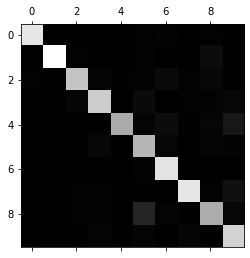

In [43]:
plt.matshow(conf_mtx,cmap=plt.cm.gray)
plt.show()

In [44]:
#svm scale poorly with large training sets

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,y_pred)

0.8792857142857143